# Explore data
we use [bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model) as feature of comments. Firstly, we have to preprocess all text data. Steps to preprocess data:
1. Convert upper letters to lower letters.
2. Remove punctuations.
3. Split all sentences into seperated words.
4. Remove [stop words](https://en.wikipedia.org/wiki/Stop_word]).
5. Remove words and digits containing digits.
6. Stemming and Lemmatization.
7. With a new comment, we remove words that model does not know.

First, read data, and explore it.

In [10]:
import numpy as np
import pandas as pd

from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config

In [4]:
# Read data
data = pd.read_excel('data/data_rates_cate.xlsx')

data.head()

,Title,Content,Rate
0,"A crime against humanity, it's like a form of ...",This film is so bad that it would be preferabl...,Bad
1,4.0 what the hell,how can this film get a higher rating than par...,Bad
2,don't even think about it...,"What shall I say, seeing the trailer was bad e...",Bad
3,It's not that bad,I barely understand why this film was harshly ...,Bad
4,What a goofy film!,"Clumsy comedy with cheesy ""special effects"" (i...",Bad


Number of columns and number of rows

In [5]:
(num_rows, num_cols) = data.shape
print('Number of rows: {0}'.format(num_rows))
print('Number of cols: {0}'.format(num_cols))

Number of rows: 5833
Number of cols: 3


## What is the meaning of each row

Each row in DataFrame gives the survey result of a person.

## What is the meaning of each column

Each comment has 3 attributes:
* Title
* Cotent
* Rate

Rate is the attribute we want to predict.

## What datatype of each column

Datatype of each column

In [6]:
data.dtypes

Title      object
Content    object
Rate       object
dtype: object

## Let see what we will predict

In [7]:
data['Rate'].value_counts()

Good    2931
Bad     2902
Name: Rate, dtype: int64

<AxesSubplot:>

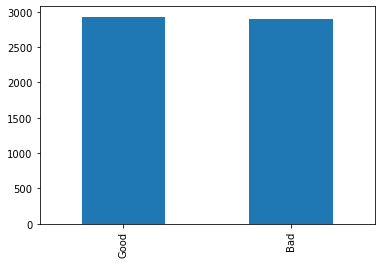

In [6]:
data['Rate'].value_counts().plot.bar()

We will predict is it positive or negative comment. We have a very large and balance (the number of good comment and the number of bad comment are close) data.

## Preprocess data (Split data)

We split data into training, validation and testing sets with percentage $60\%, 20\%, 20\%$.

In [8]:
y_sr = data['Rate']
X_df = data.drop('Rate', axis=1)

In [19]:
# Split data into training and test sets
X_df, test_X_df, y_sr, test_y_sr= train_test_split(X_df, y_sr, test_size=0.2, stratify=y_sr, random_state=0)

# Split training set into training and validation sets
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.25, stratify=y_sr, random_state=0)

In [20]:
train_X_df.shape

(2799, 2)

In [21]:
train_y_sr.shape

(2799,)

In [22]:
val_X_df.shape

(933, 2)

In [23]:
val_y_sr.shape

(933,)

In [24]:
test_X_df.shape

(934, 2)

In [25]:
test_y_sr.shape

(934,)

## Explore training data

Because data is text, so that we need to translate it into catagory or numerical. We use bag of words technique